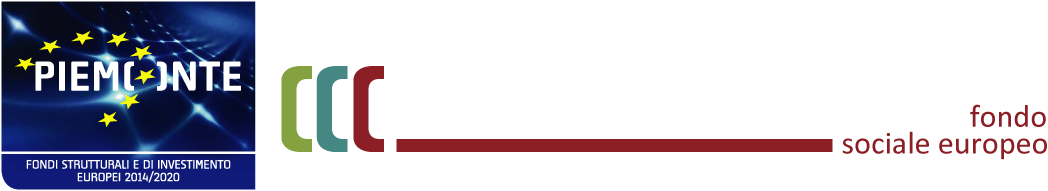





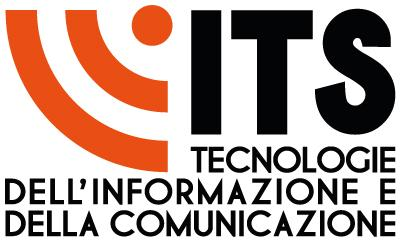




**Unità Formativa (UF):** AI e Machine Learning - Python

**Docente:** Fabio Giuseppe Antonio Gagliardi

**Titolo argomento:** esame finale


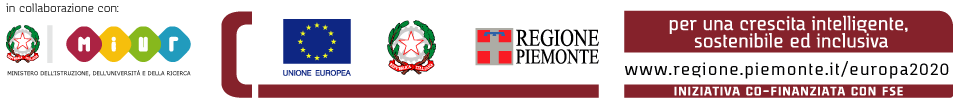



---



NOME: Brian Junior

\

COGNOME: Potosi Ccuno



---



# **REGOLE ESAME**

* **Commentare i passaggi importanti. Nello specifico:**
  *  **a cosa serve un blocco di codice, una classe o una funzione**
  *  **motivare le scelte effettuate nel codice.**

  * **L'ASSENZA DI COMMENTI SARÀ VALUTATA NEGATIVAMENTE**
  * **LE PROVE CHE DOVESSERO RIPORTARE GLI STESSI COMMENTI E LO STESSO CODICE COPIATO SARANNO VALUTATE NEGATIVAMENTE**

  es.

```
# Ho creato una classe Foo per questo motivo ...
# Funzione per calcolare ...
# Ho optato per questa soluzione perché ....
```

* **Sviluppare tutti i passaggi necessari al raggiungimento del modello di apprendimento ottimale.**

* **Visualizzare le metriche necessarie a comprendere il percorso effettuato.**

* **È richiesta la stesura di una legenda per tutti i grafici.**



* **Il progetto dovrà essere interamente contenuto nel presente notebook di Colab.**


# **Dati**

**dataset**: https://raw.githubusercontent.com/FabioGagliardiIts/ai_ml_python/main/Esami/Esame_2/carprice_data.csv

**descrizione**: https://github.com/FabioGagliardiIts/ai_ml_python/blob/main/Esami/Esame_2/carprice_data_dictionary.xlsx

**fonte**: https://www.kaggle.com

# **Progetto**

Una nuova azienda automobilistica europea sta cercando di entrare nel mercato USA. Ci chiede quindi una consulenza, per essere aiutata a comprendere i fattori da cui dipende il prezzo stabilito dalla concorrenza riguardo la vendita dei propri veicoli.

L'azienda ci fornisce una raccolta di dati e vuole ottenere nello specifico:

- **una rappresentzaione grafica dei dati esistenti con gli indici statistici più rilevanti**
- **una selezione delle variabili realemente utili alla predizione dei prezzi**
- **una visualizzazione del livello di accuratezza raggiunto nei test di predizione**












In [42]:
#######################
#LIBRERIE DA IMPORTARE#
#######################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
##########################
#PREPARAZIONE DEL DATASET#
##########################
url="https://raw.githubusercontent.com/FabioGagliardiIts/ai_ml_python/main/Esami/Esame_2/carprice_data.csv"
df=pd.read_csv(url)
# df.head()
display(df.describe())
# df.info()
# display(df)
########
#COLORS#
########
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [44]:
#tolgo il nome della macchina per separarlo solo per nome azienda
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
# df.head()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


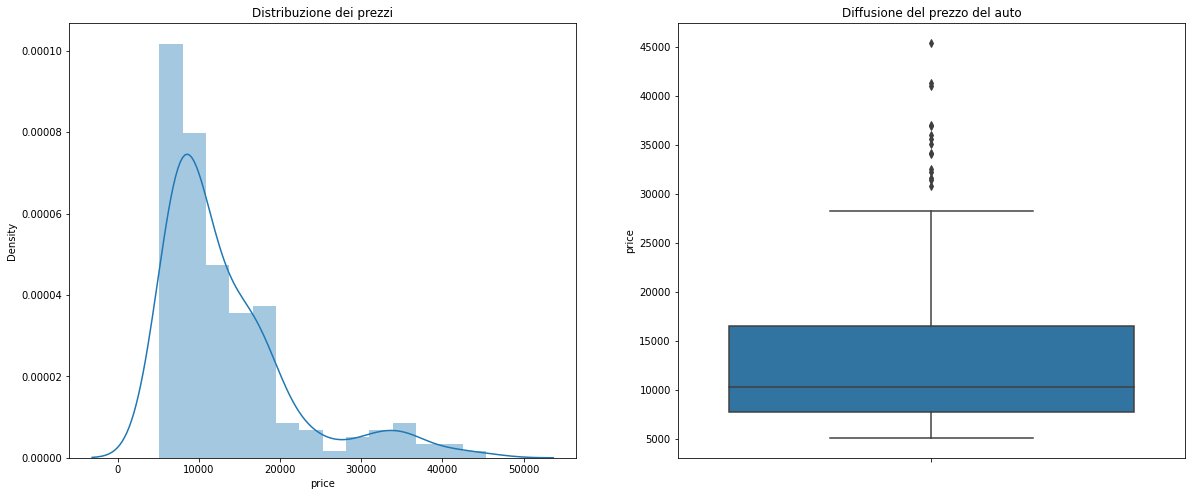

In [45]:
plt.figure(figsize=(20,8))
#ho presso questi grafici da internet nonostante google colab mi consiglia di sostituire displot per histplot ho preferito lasciarlo cosi in quanto il grafico viene meglio
plt.subplot(1,2,1)
plt.title('Distribuzione dei prezzi')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Diffusione del prezzo del auto')
sns.boxplot(y=df.price)

plt.show()

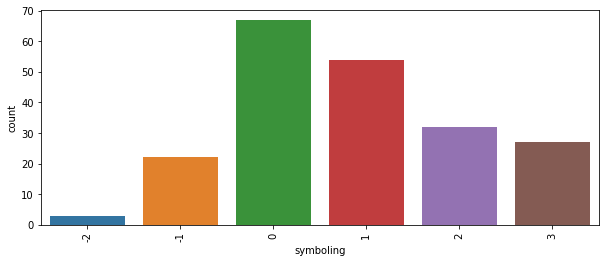

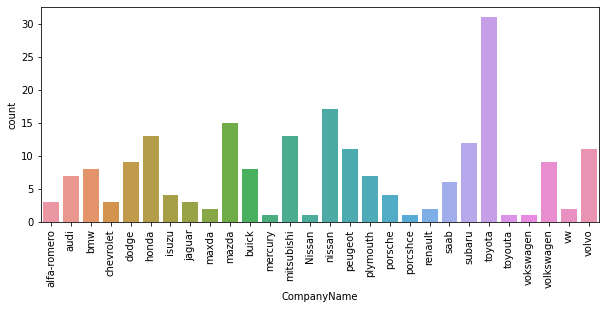

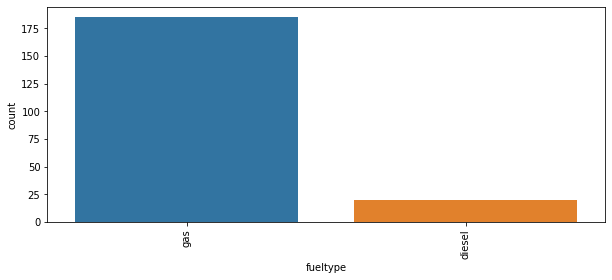

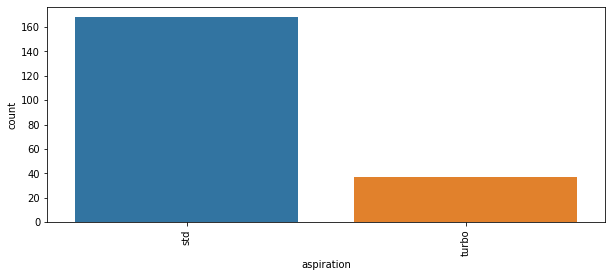

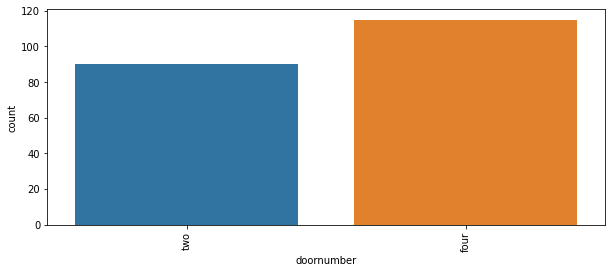

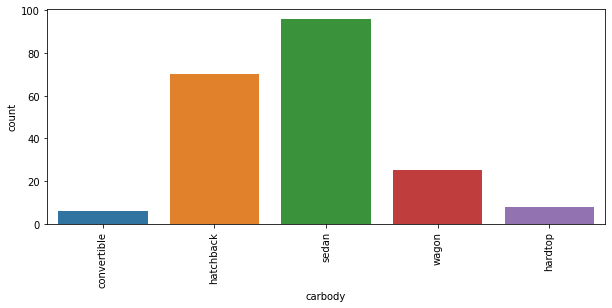

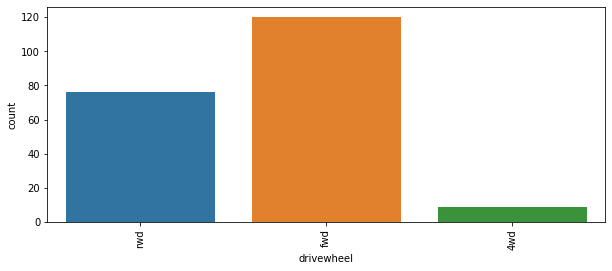

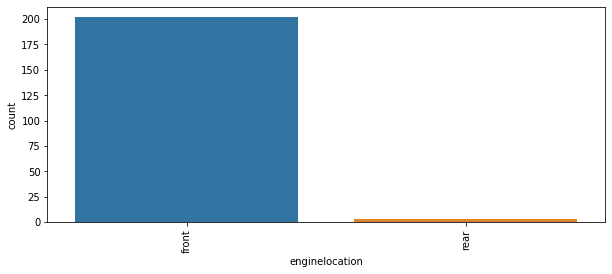

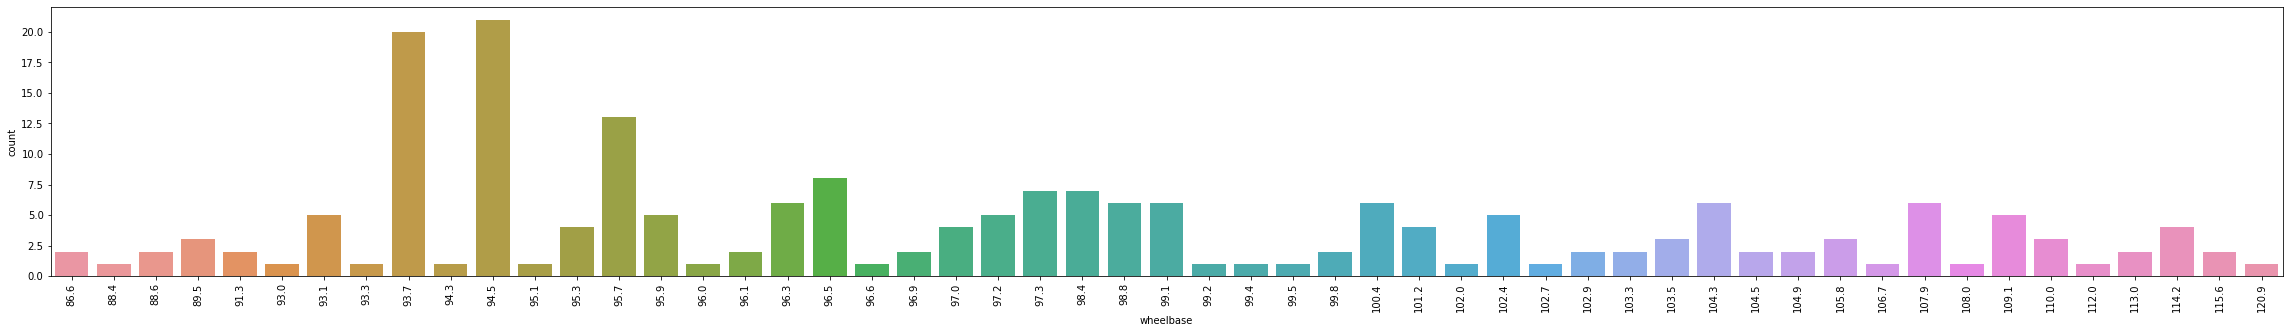

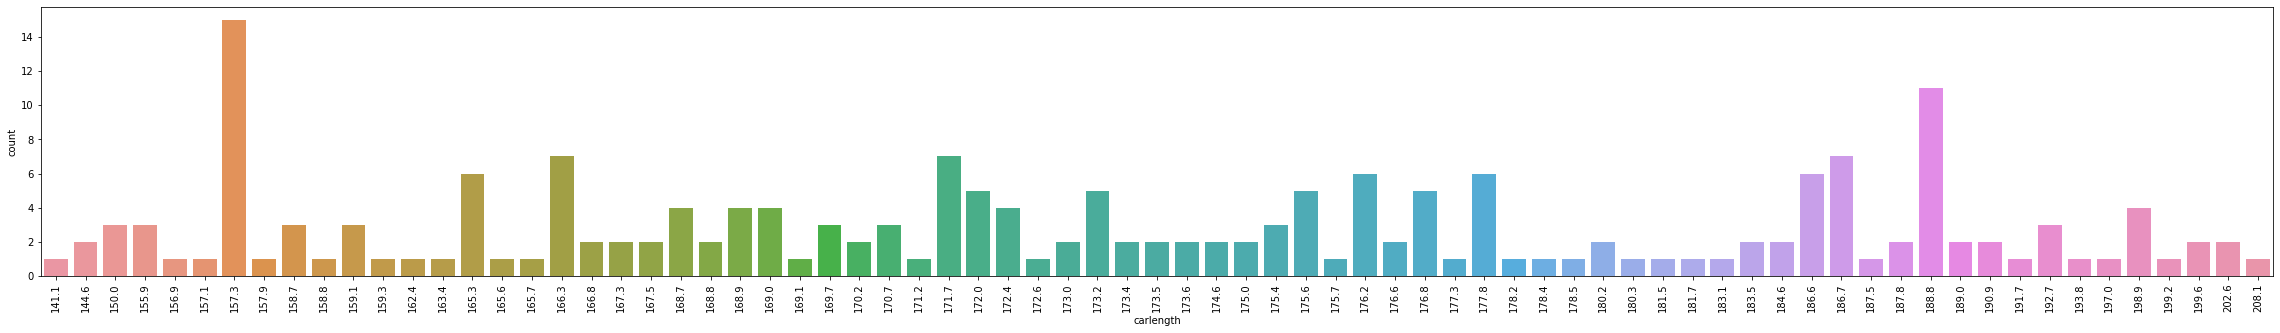

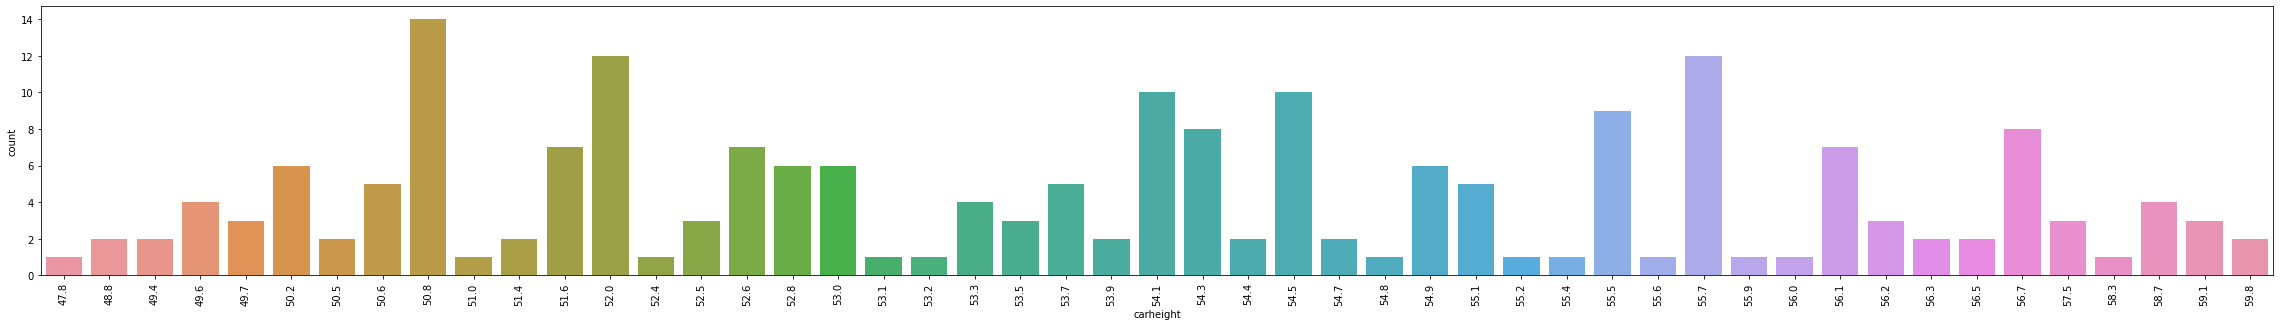

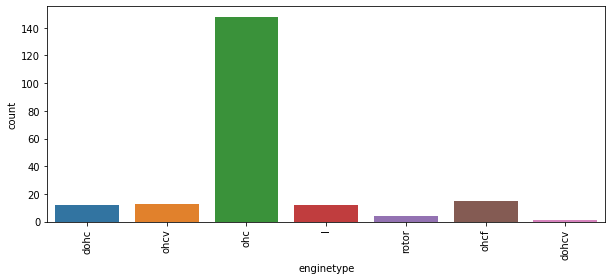

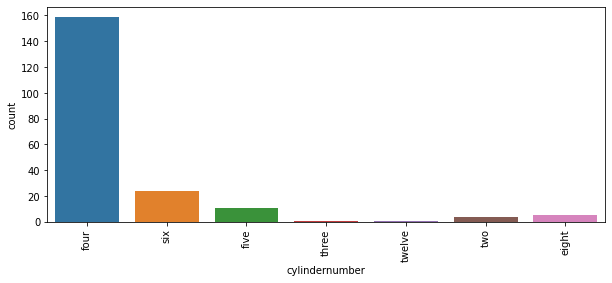

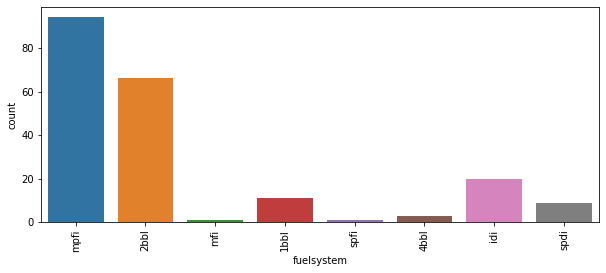

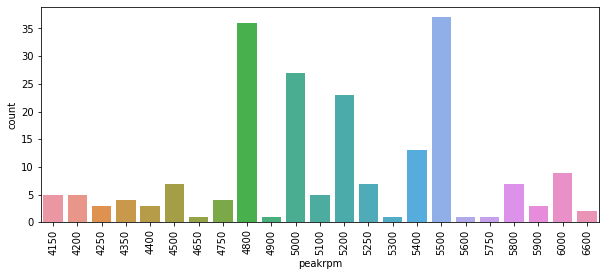

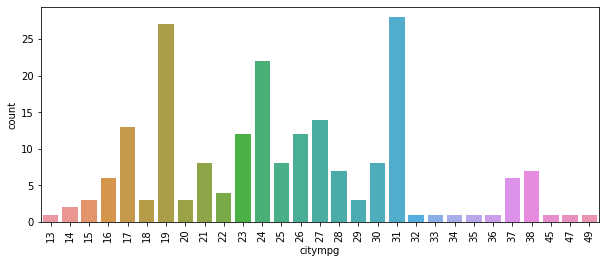

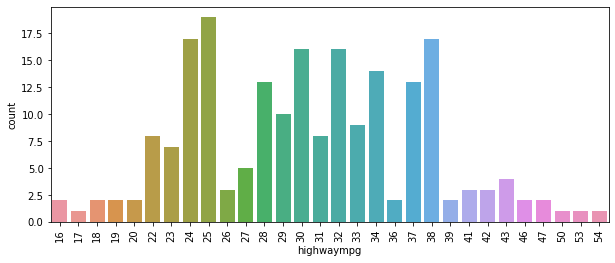

In [46]:
#CONTEGGIO

def countplot(data,fig,width,height):
  
  plt.figure(figsize=(width,height))
  plt.subplot(17,1,fig)
  plt.xticks(rotation=90)
  sns.countplot(x=data)
#ho fatto un grafico per ciascuna tabella che ho considerata che aveva valori standar da poter contegiare
countplot(df.symboling,1,10,80)
countplot(df.CompanyName,2,10,80)
countplot(df.fueltype,3,10,80)
countplot(df.aspiration,4,10,80)
countplot(df.doornumber,5,10,80)
countplot(df.carbody,6,10,80)
countplot(df.drivewheel,7,10,80)
countplot(df.enginelocation,8,10,80)
countplot(df.wheelbase,9,40,100)
countplot(df.carlength,10,40,100)
countplot(df.carheight,11,40,100)
countplot(df.enginetype,12,10,80)
countplot(df.cylindernumber,13,10,80)
countplot(df.fuelsystem,14,10,80)
countplot(df.peakrpm,15,10,80)
countplot(df.citympg,16,10,80)
countplot(df.highwaympg,17,10,80)


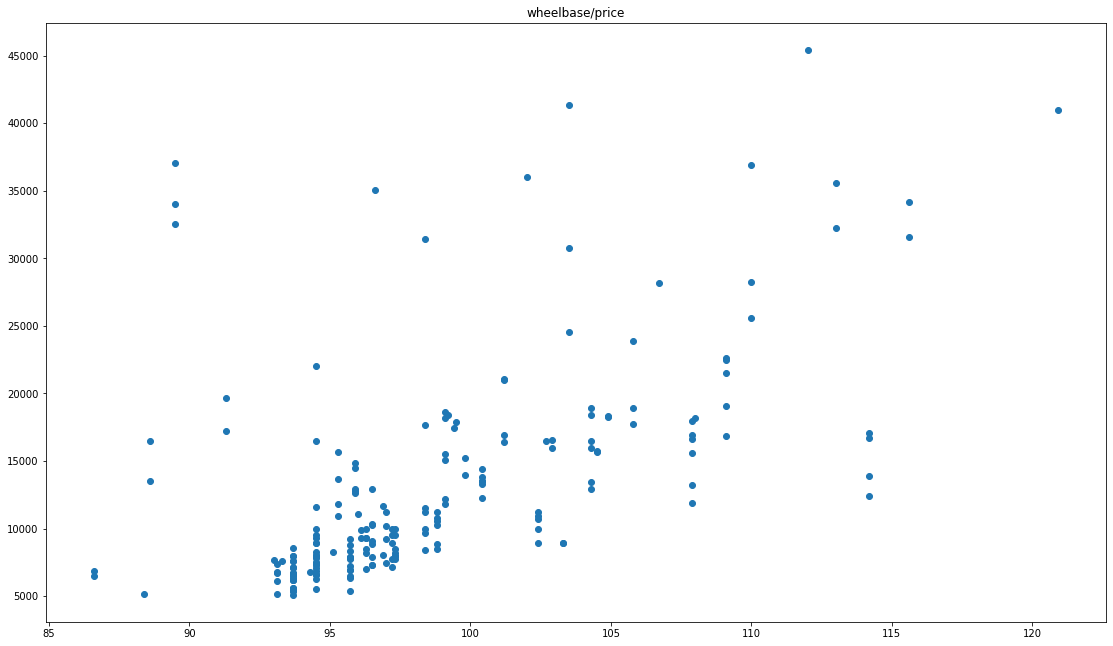

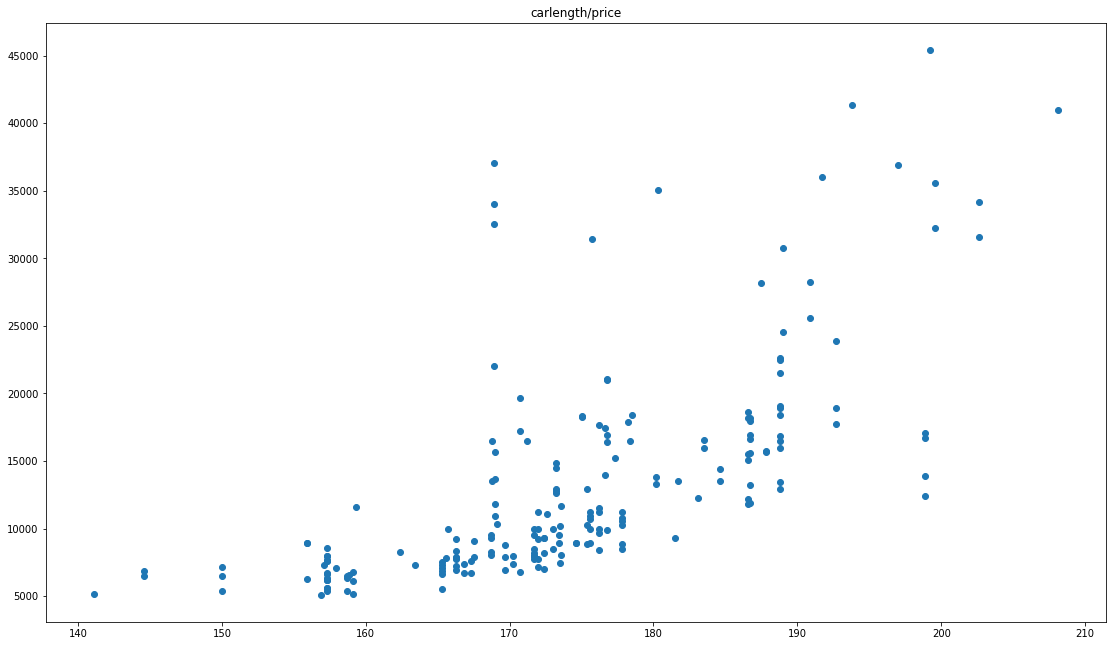

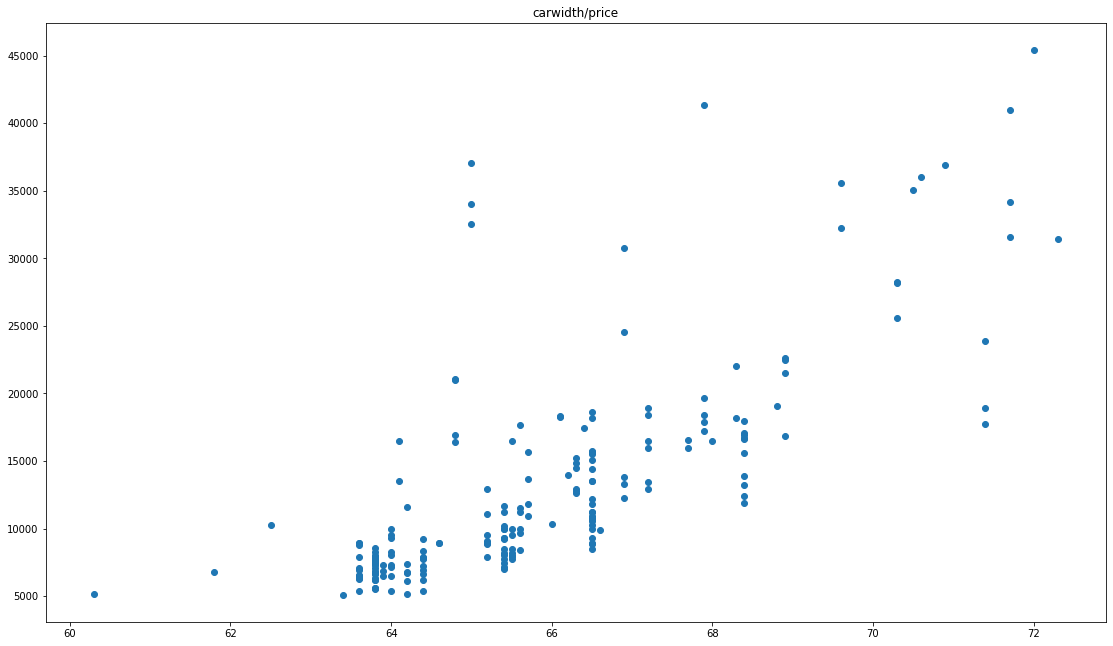

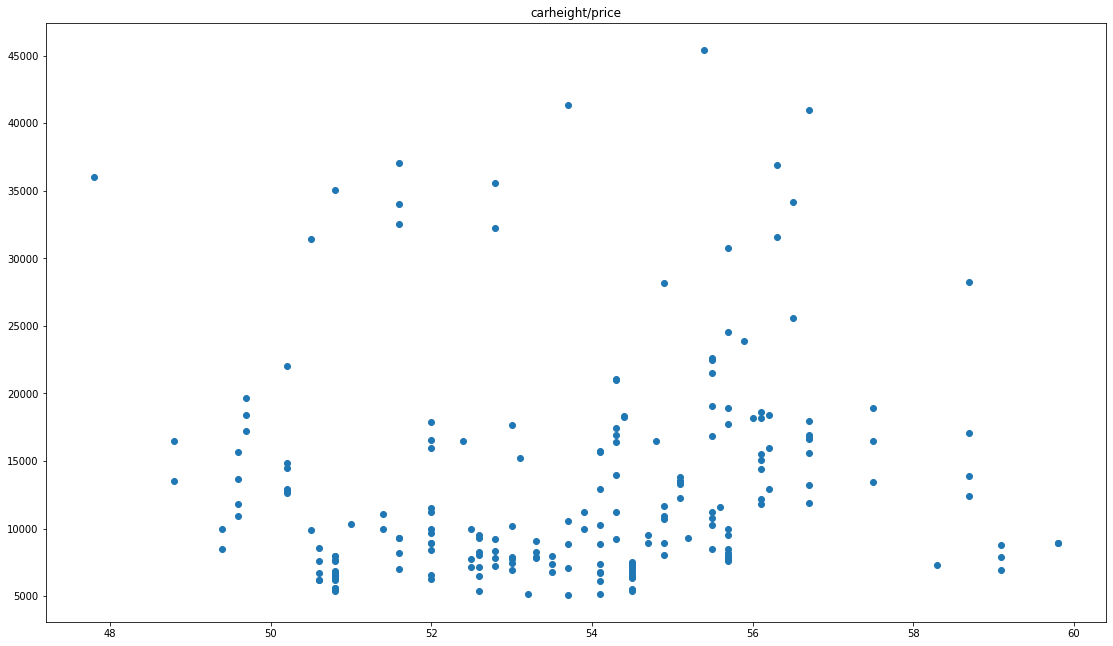

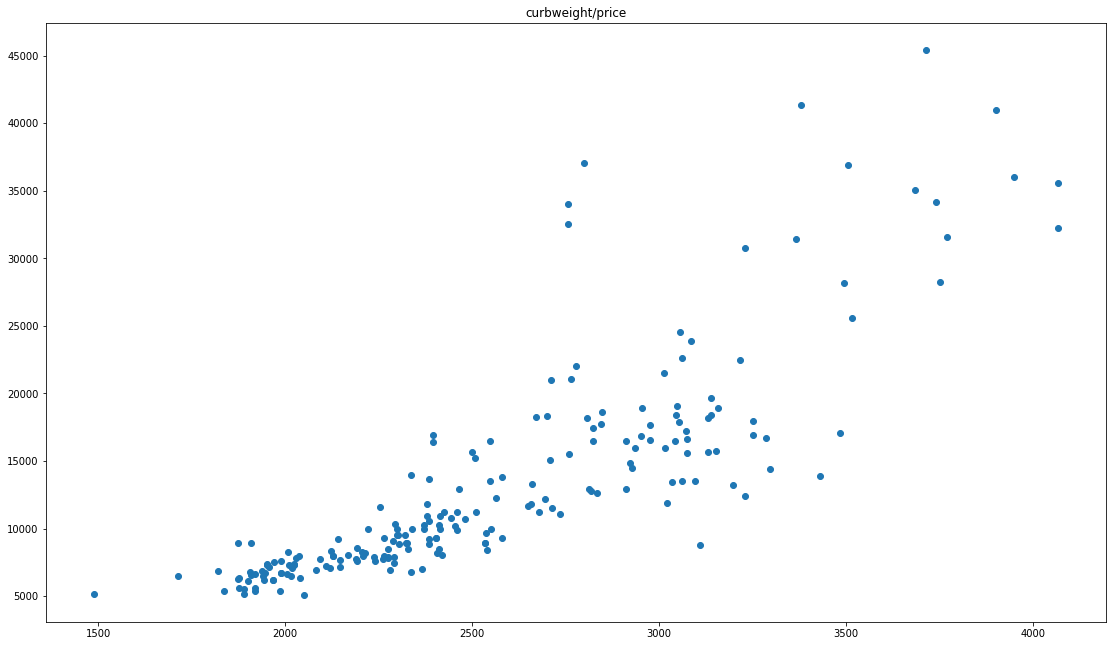

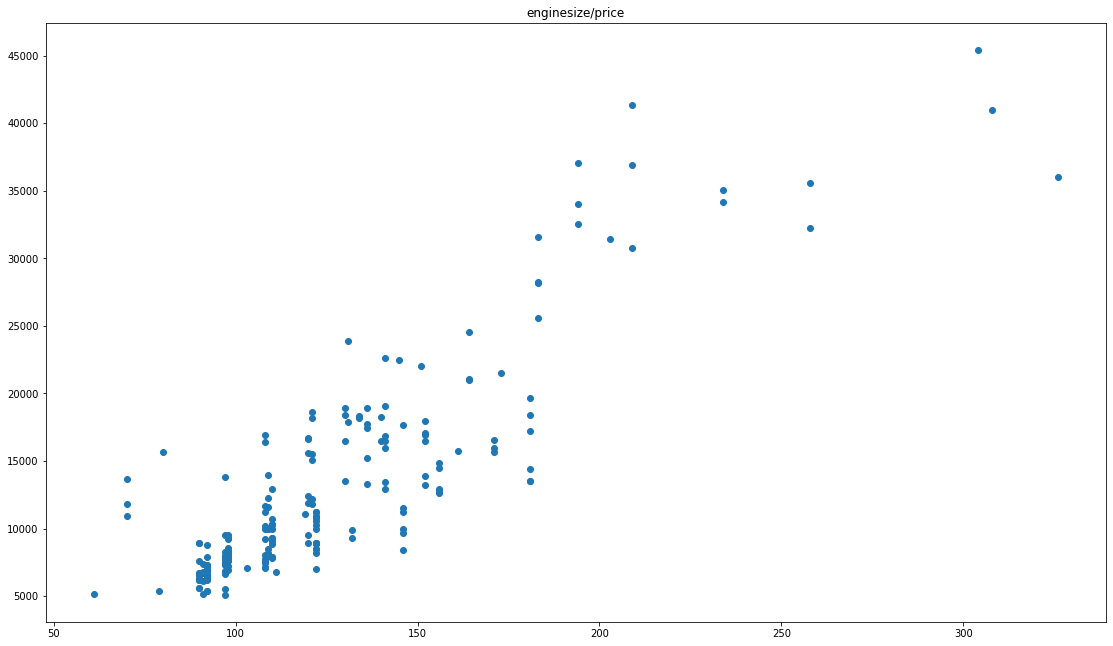

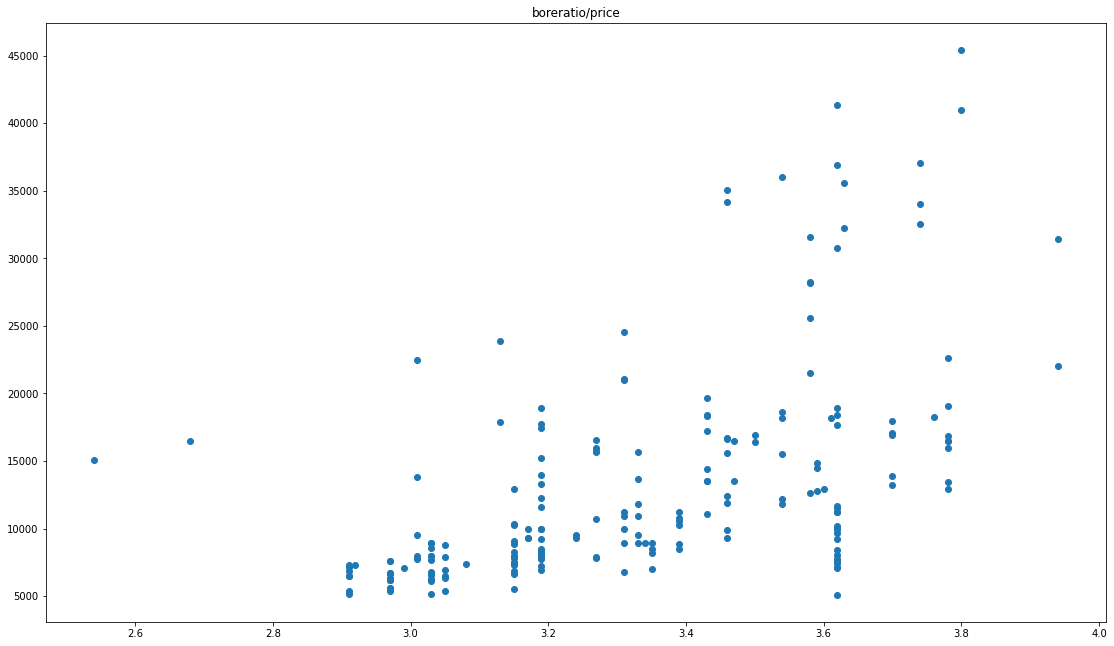

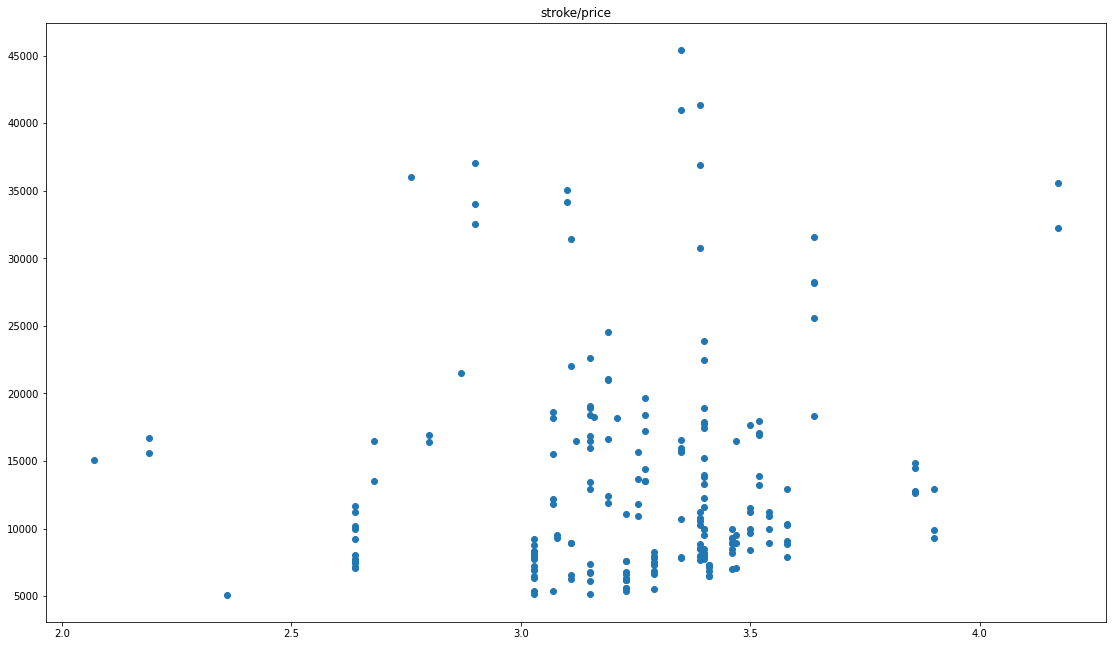

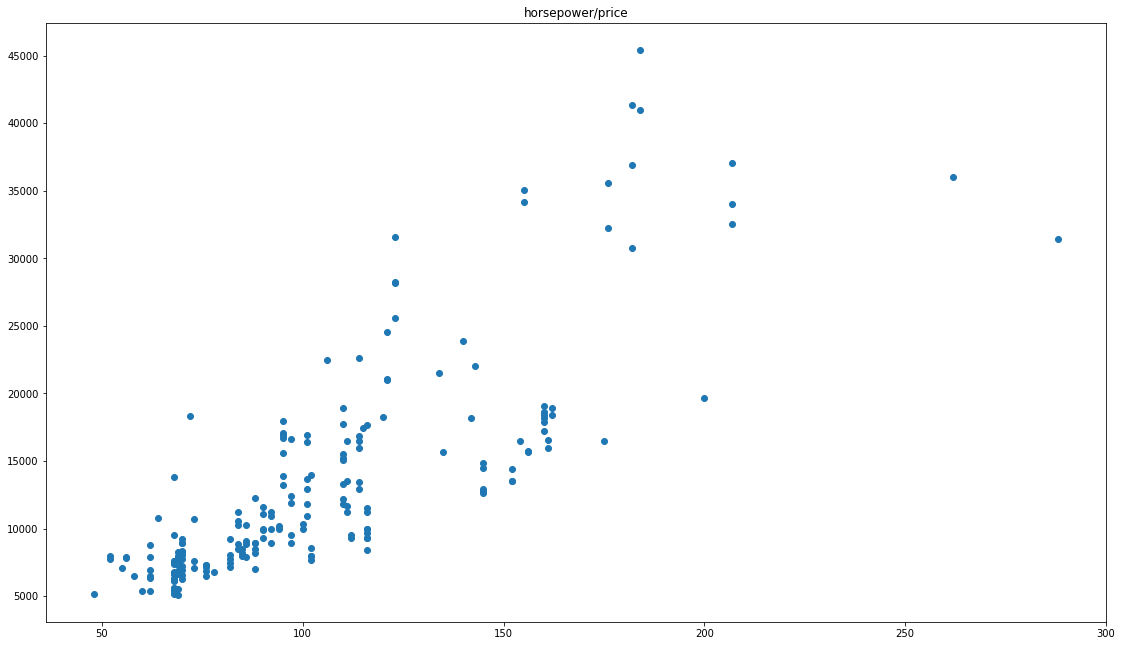

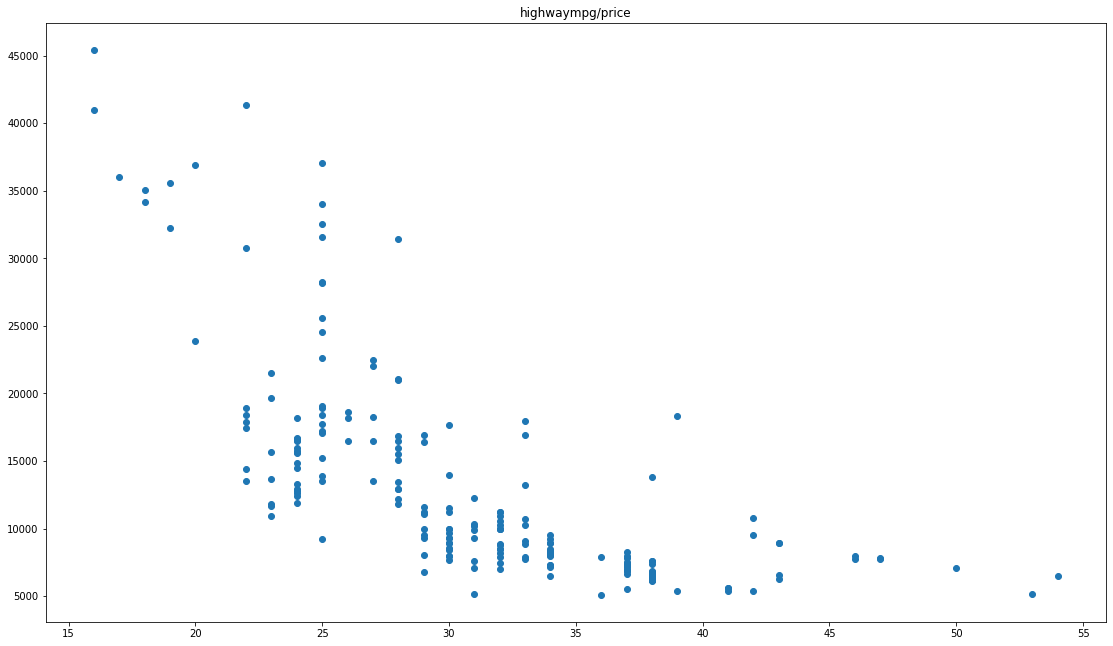

In [47]:
def scatter(x,fig):
  plt.figure(figsize=(19,130))
  plt.subplot(10,1,fig)
  plt.scatter(x,df['price'])
  plt.title(x.name+"/price")

#ho graficato solo quelli che variano il prezzo in base ai valori della colonna

scatter(df["wheelbase"],1)
scatter(df["carlength"],2)
scatter(df["carwidth"],3)
scatter(df["carheight"],4)
scatter(df["curbweight"],5)
scatter(df["enginesize"],6)
scatter(df["boreratio"],7)
scatter(df["stroke"],8)
scatter(df["horsepower"],9)
scatter(df["highwaympg"],10)



In [48]:
# df.hist(figsize=(20,15))
# plt.title("MEDV Val Distribution", fontsize=15)
# plt.show()

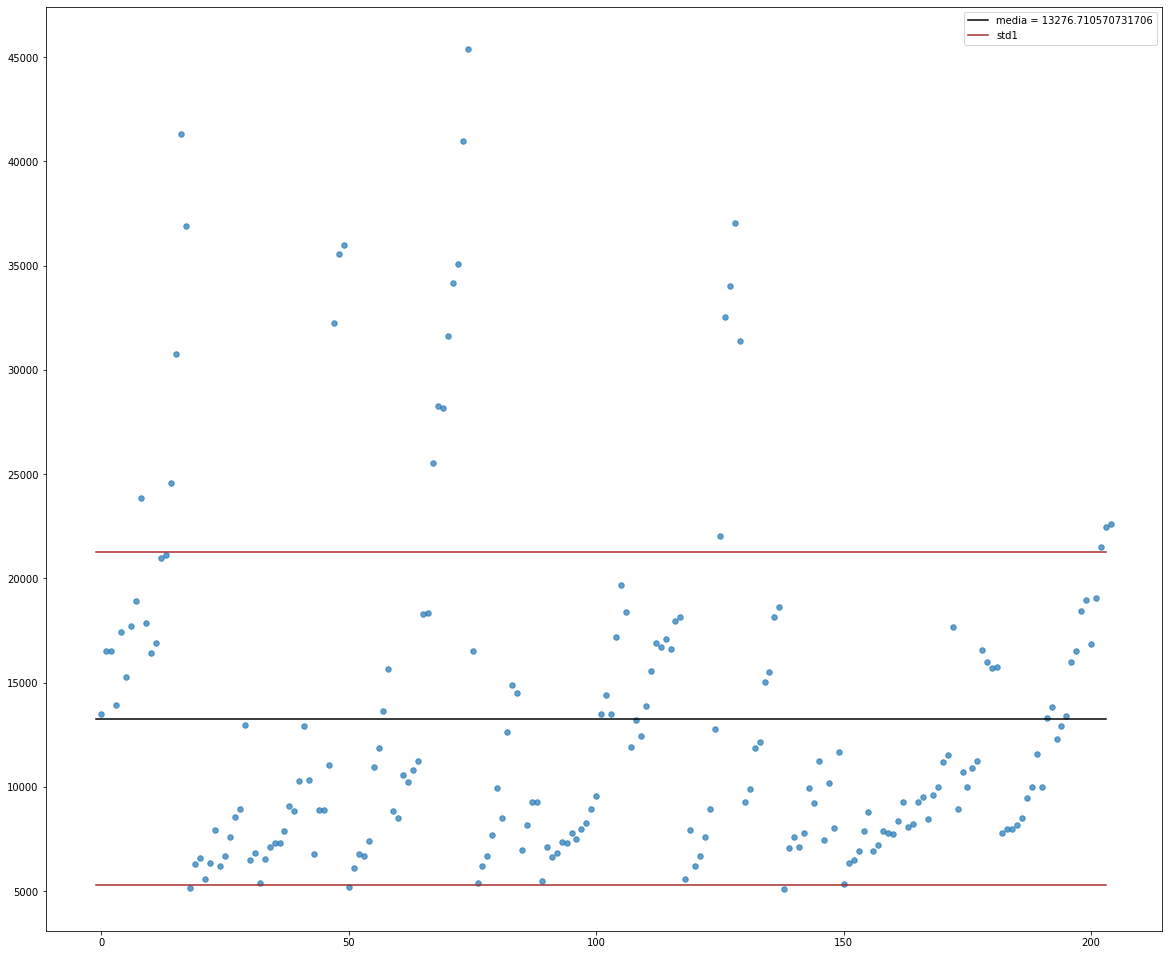

In [49]:
df_price=df['price']
mu = np.mean(df_price)#media
sigma =  np.std(df_price)#deviazione standar

dsx = np.arange(-1, df_price.size -1) #per creare la linnea retta della media nel grafico

#grafico media
plt.figure(figsize=(20,17))
plt.plot(dsx, np.full_like(df_price, mu), color="black", label= 'media = ' + str(mu))
#grafico deviazione standar

plt.plot(dsx, np.full_like(df_price, mu - sigma),       color="brown",  label="std1")
plt.plot(dsx, np.full_like(df_price, mu + sigma),       color="brown")


#dati
plt.scatter(np.arange(df_price.size), df_price, s=30, alpha = 0.7)
plt.legend()

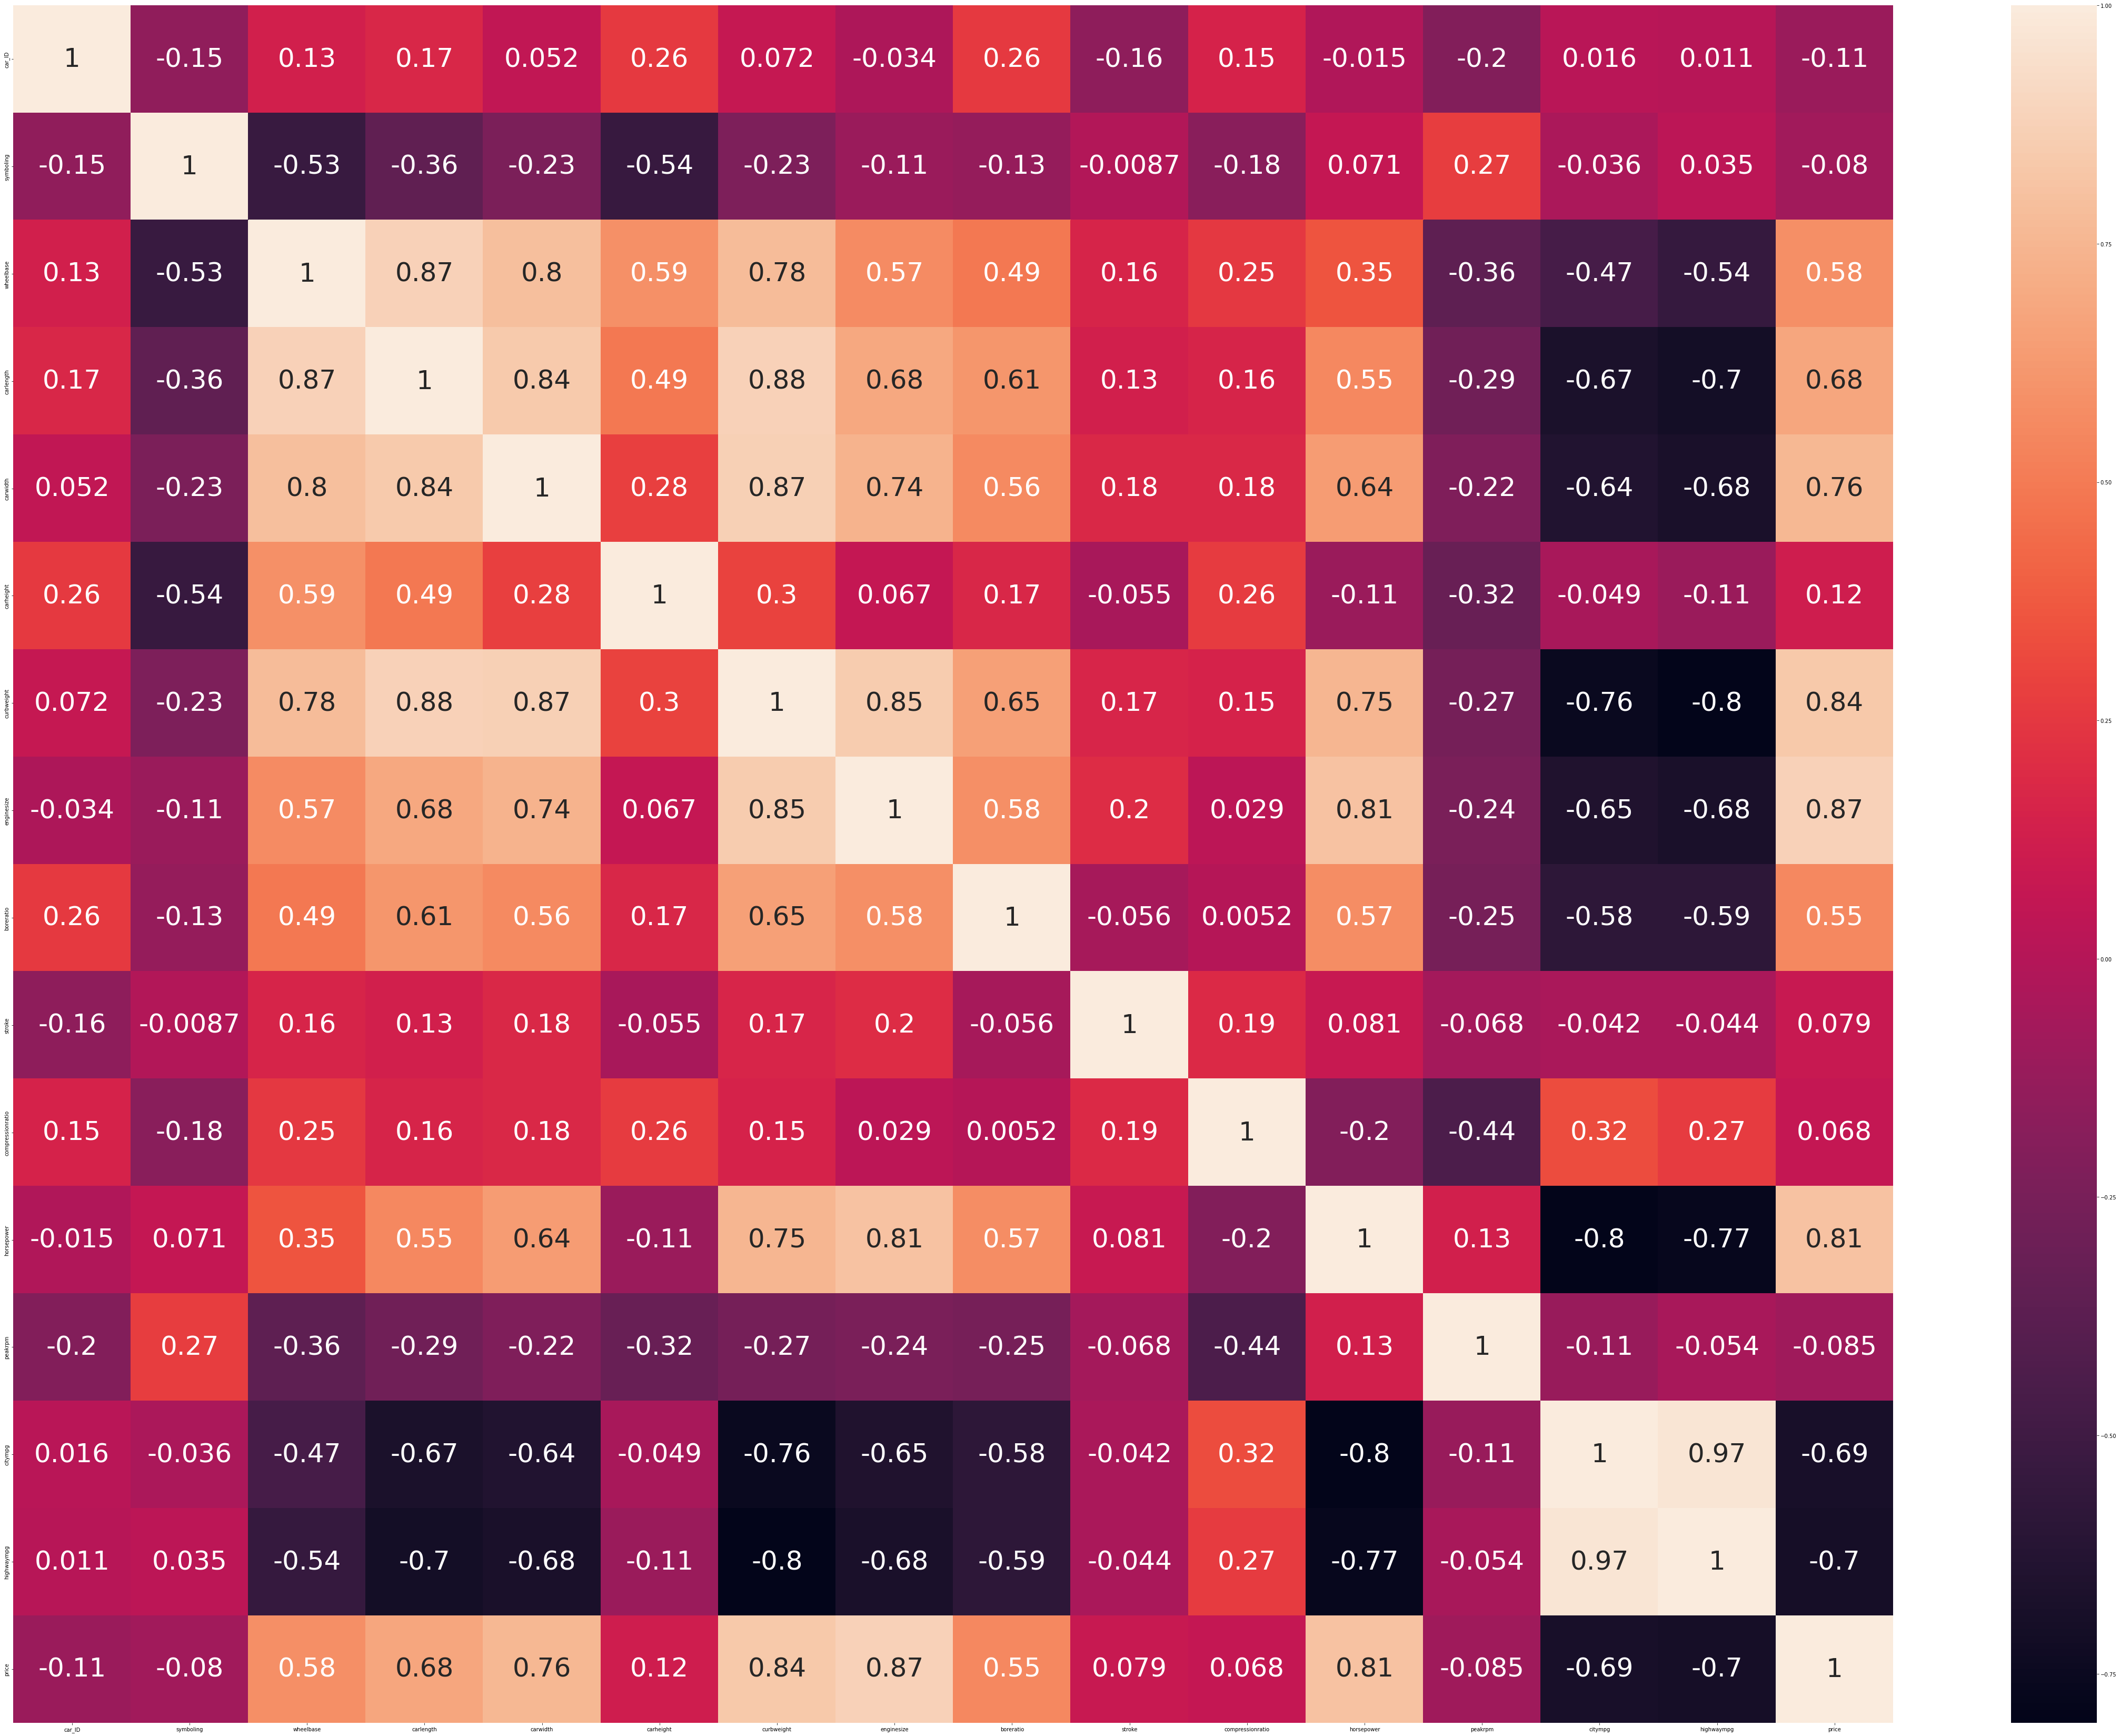

In [56]:
#correlazionie
corr_matrix = df.corr()

plt.figure(figsize=(80, 60))

sns.heatmap(corr_matrix, annot=True, annot_kws={"fontsize":50})



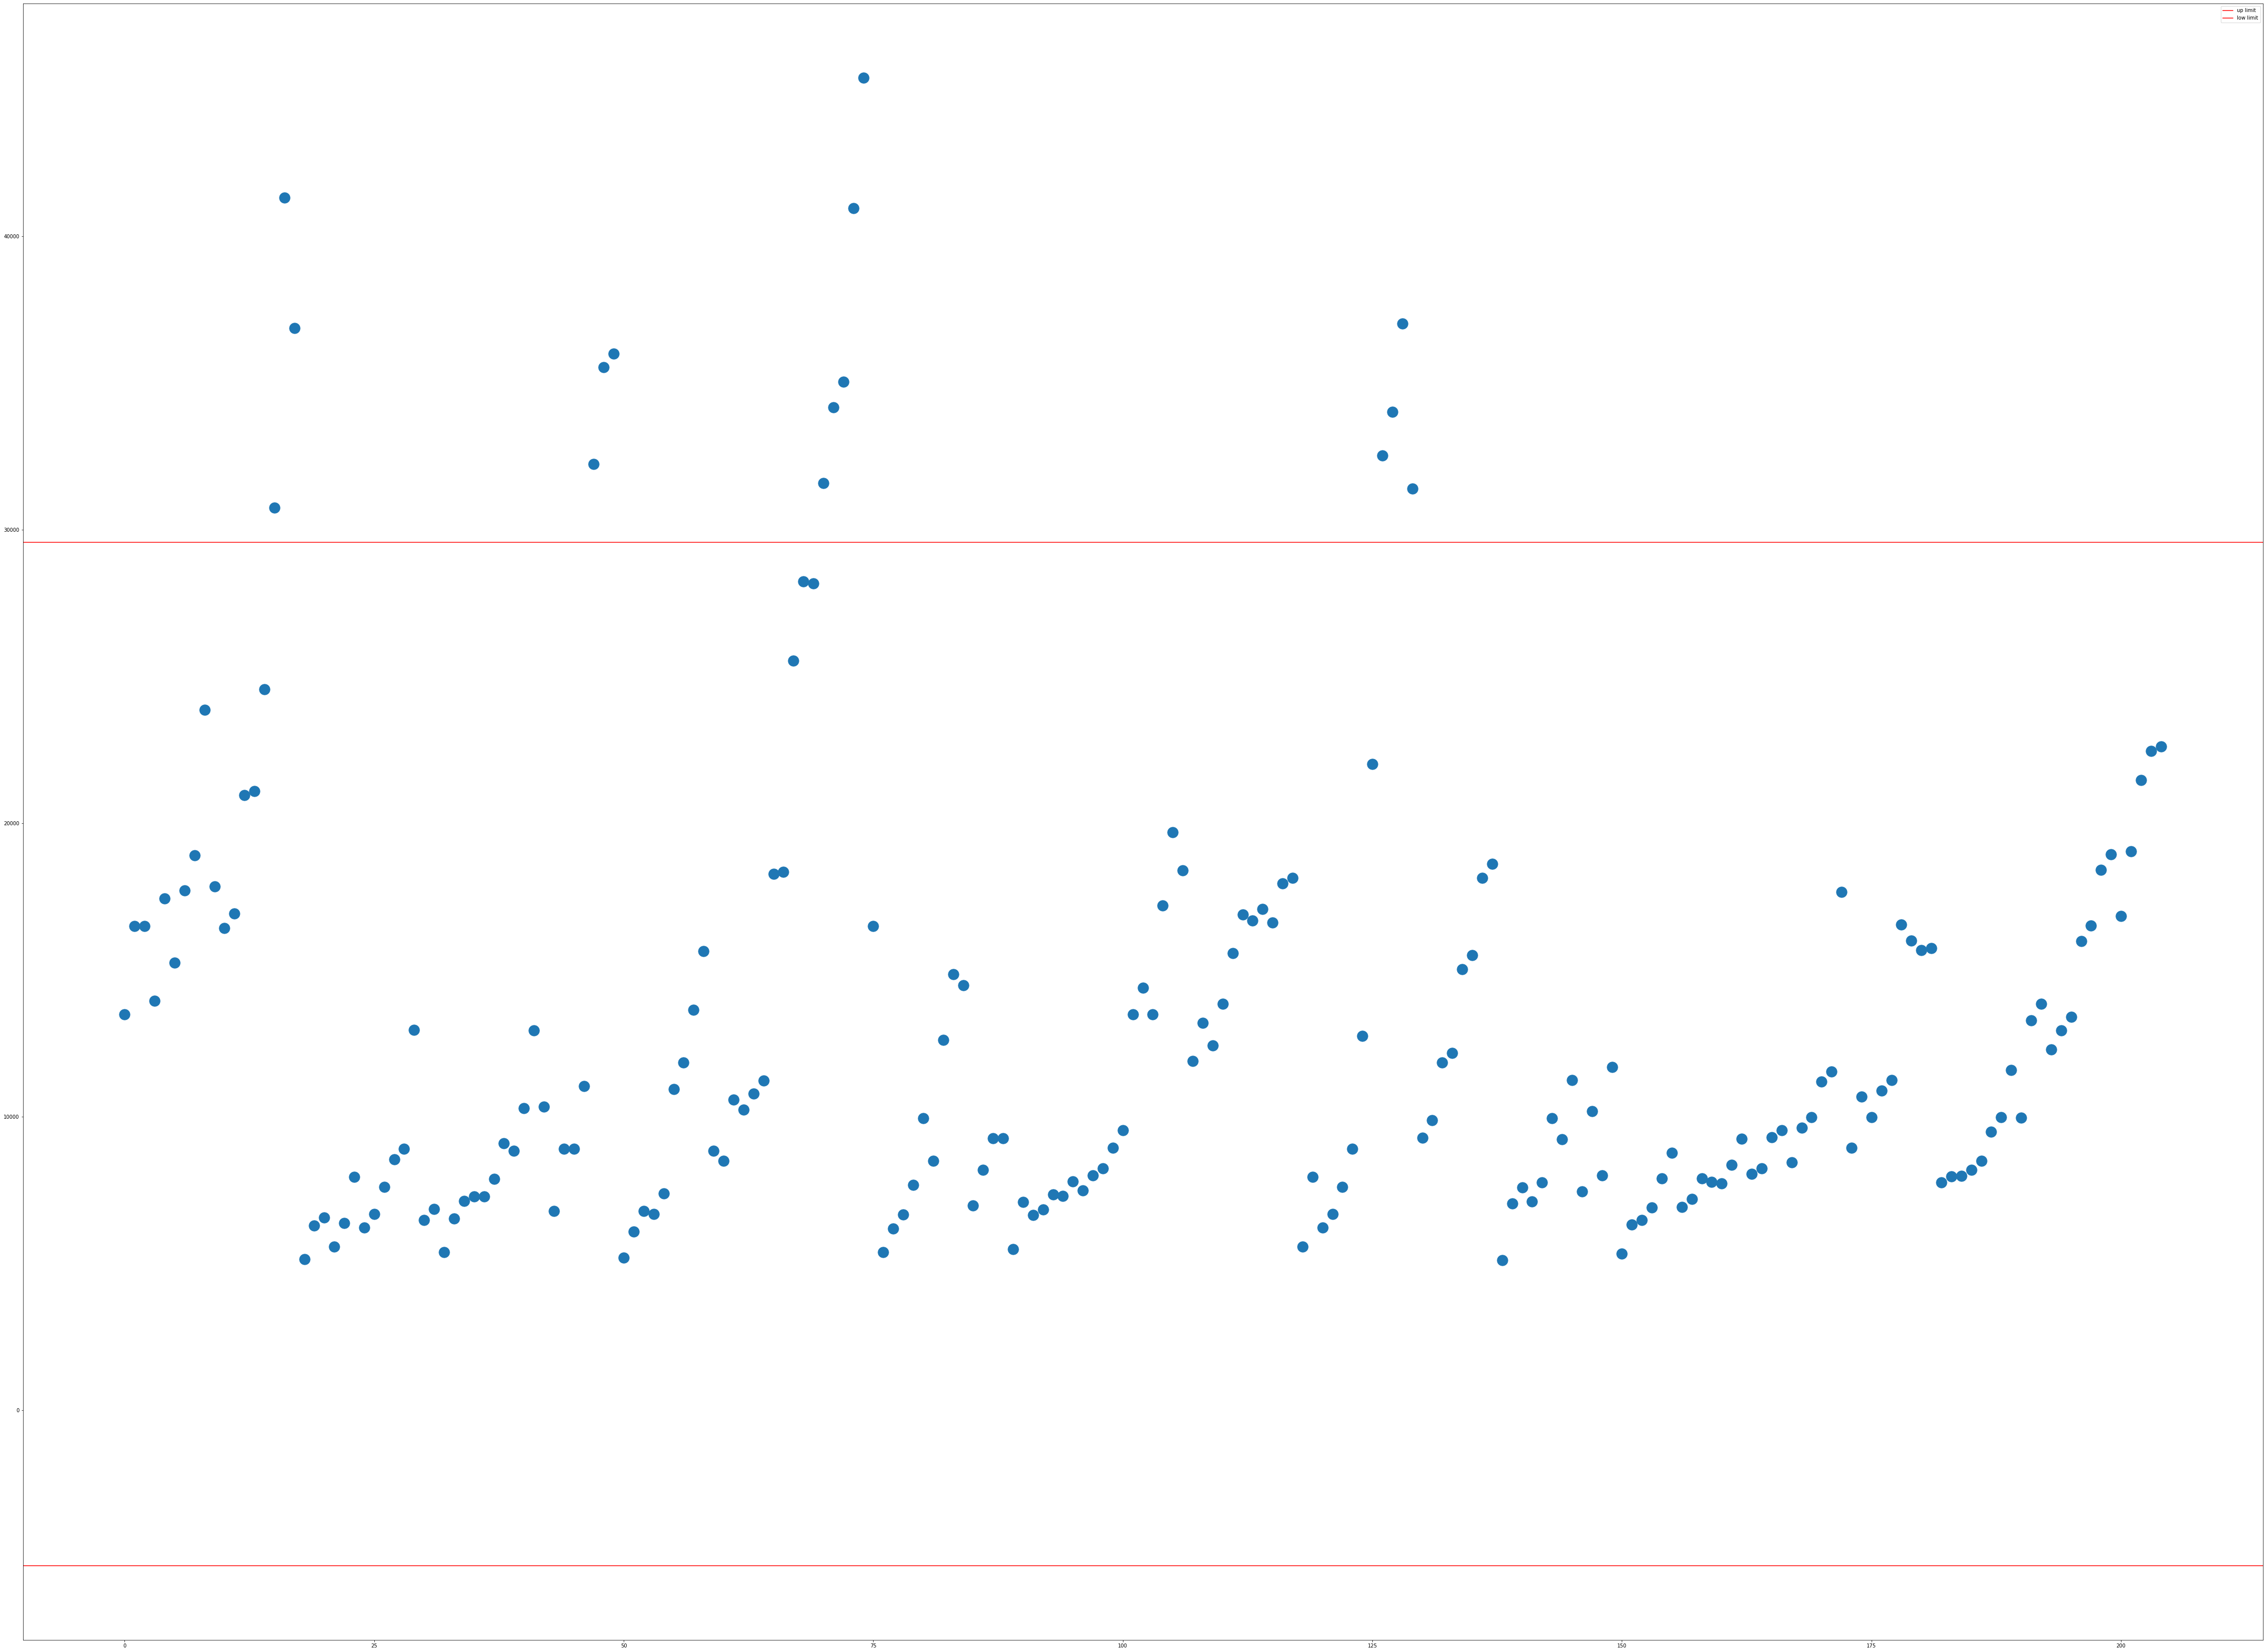

In [51]:
#limiti interquartile di price

def limite_interquartile(data: pd.DataFrame):
  q25 = data.quantile(0.25)
  q75 = data.quantile(0.75)
  iqr  = (q75 - q25)  
  up_limit  = q75 + iqr * 1.5
  low_limit = q25 - iqr * 1.5
  return up_limit, low_limit

def plot_distribuzione_generica(data: pd.DataFrame,  up_limit: float, low_limit: float) :
  plt.figure(figsize=(80,60))
  plt.scatter(np.arange(len(data)),data, alpha=1,s=450)
  # up limit
  plt.axhline(up_limit, color = 'red', linestyle = '-', label='up limit') 
  # low limit
  plt.axhline(low_limit, color = 'red', linestyle = '-', label = 'low limit')
  plt.legend()
  plt.show()

#limite interquartile
price_up_limit, price_low_limit = limite_interquartile(df_price)
#plot del limite interquartile
plot_distribuzione_generica(df_price, price_up_limit, price_low_limit)



In [52]:
!pip install sklearn2pmml

!pip install pypmml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


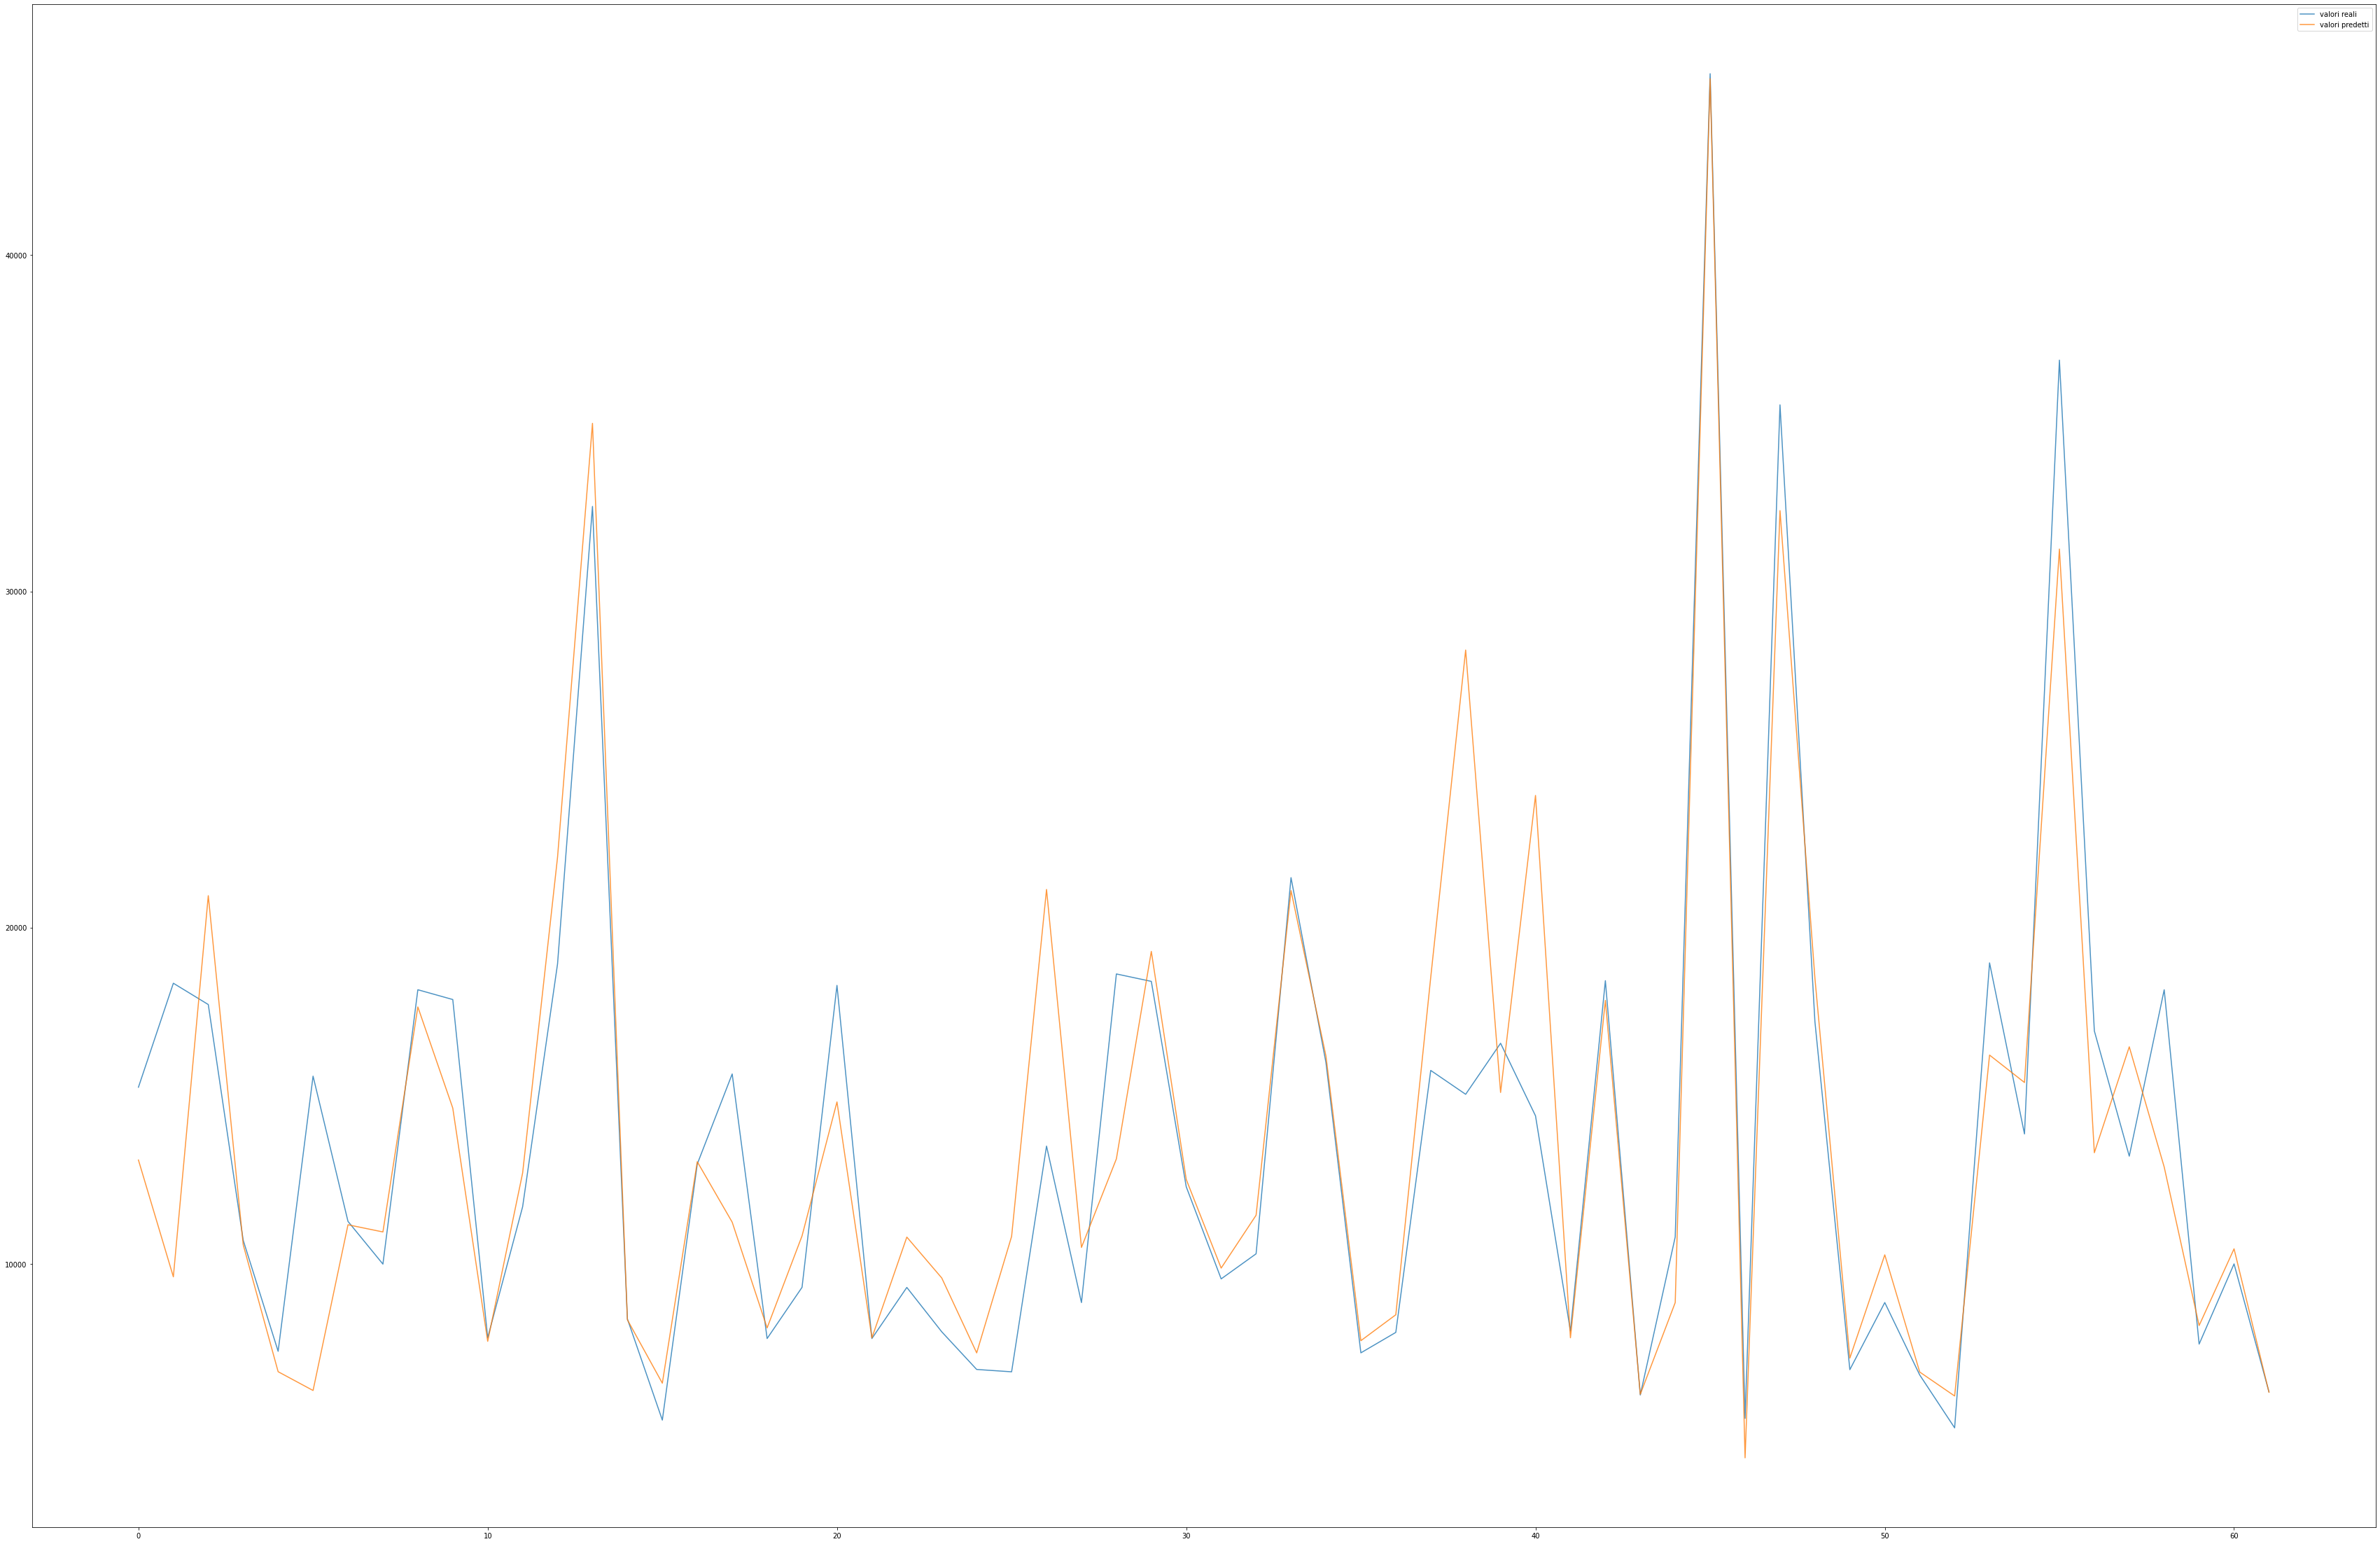

In [53]:
#modello di predizione visto nella lezione 16

from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn2pmml import sklearn2pmml
from sklearn2pmml.pipeline import PMMLPipeline
from pypmml import Model

X = df[["wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","horsepower","highwaympg"]]
Y = df["price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

poly_degree         = 3
ridge_alpha         = 10
ridge_fit_intercept = True

slc   = StandardScaler()
poly  = PolynomialFeatures(degree=poly_degree)
ridge = Ridge(alpha=ridge_alpha, fit_intercept=ridge_fit_intercept)

pmml_pipe = PMMLPipeline(steps=[ ("slc", slc),("poly", poly),("ridge", ridge)] )

pmml_pipe.fit(X_train, Y_train)

sklearn2pmml(pmml_pipe, "cars.pmml", with_repr = True)

model = Model.fromFile('cars.pmml')

Y_pred = model.predict(X_test)

#grafico
plt.figure(figsize=(60,40))
plt.plot(np.arange(Y_test.size), Y_test,  alpha=0.8, label="valori reali")
plt.plot(np.arange(Y_pred.size), Y_pred, alpha=0.8, label="valori predetti")
plt.legend()
plt.show()